In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv"
df = pd.read_csv(url)

In [32]:
# 기본 정보 확인
print("데이터셋 기본 정보:")
print(df.info())
print("\n데이터셋 처음 5행:")
print(df.head())

데이터셋 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB
None

데이터셋 처음 5행:
   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770   

In [34]:
# 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [36]:
# 레이블 확인 (Rings)
print("\n레이블(Rings) 분포:")
print(df['Rings'].value_counts().sort_index())


레이블(Rings) 분포:
Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64


In [38]:
# 데이터 엔코딩
# Sex 열에 대해 원-핫 인코딩 수행
df = pd.get_dummies(df, columns=['Sex'])

In [40]:
# 레이블 엔코딩 (Rings)
label_encoder = LabelEncoder()
df['Rings'] = label_encoder.fit_transform(df['Rings'])

# 특성과 레이블 분리
X = df.drop(['id', 'Rings'], axis=1)
y = df['Rings']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

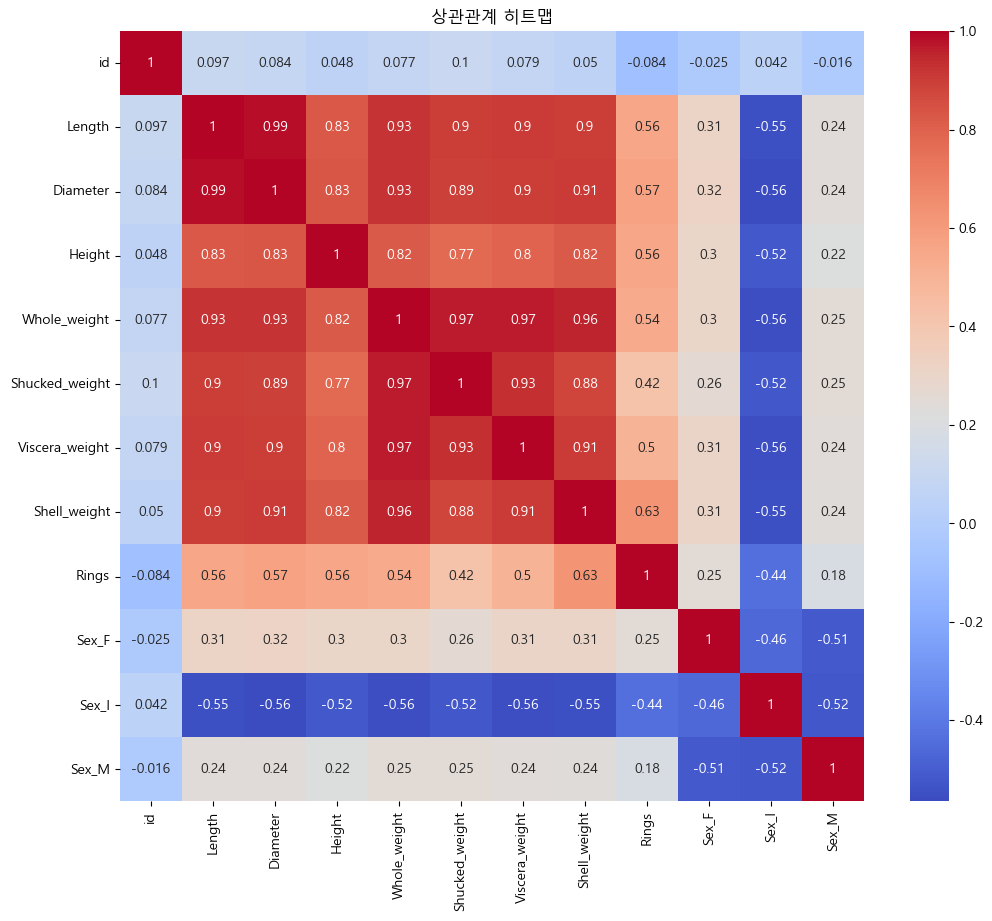

In [42]:
# 데이터 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

In [46]:
# TensorFlow 모델 생성
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 요약
print("\n모델 구조:")
model.summary()

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


모델 구조:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 71.1338 - mae: 7.6608 - val_loss: 18.2205 - val_mae: 3.3013
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 16.9271 - mae: 2.9332 - val_loss: 6.9034 - val_mae: 1.9099
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 7.1034 - mae: 1.8189 - val_loss: 5.2454 - val_mae: 1.6850
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 5.4985 - mae: 1.6625 - val_loss: 4.7391 - val_mae: 1.5512
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 5.4703 - mae: 1.6652 - val_loss: 4.5105 - val_mae: 1.4907
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 5.5529 - mae: 1.6716 - val_loss: 4.4814 - val_mae: 1.4539
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 5.3297 - mae: 1.5982 - val_loss: 4.3062 - val_mae: 1.4637
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 5.6338 - mae: 1.6995 - val_loss: 4.2377 - val_mae: 1.4548
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 783us

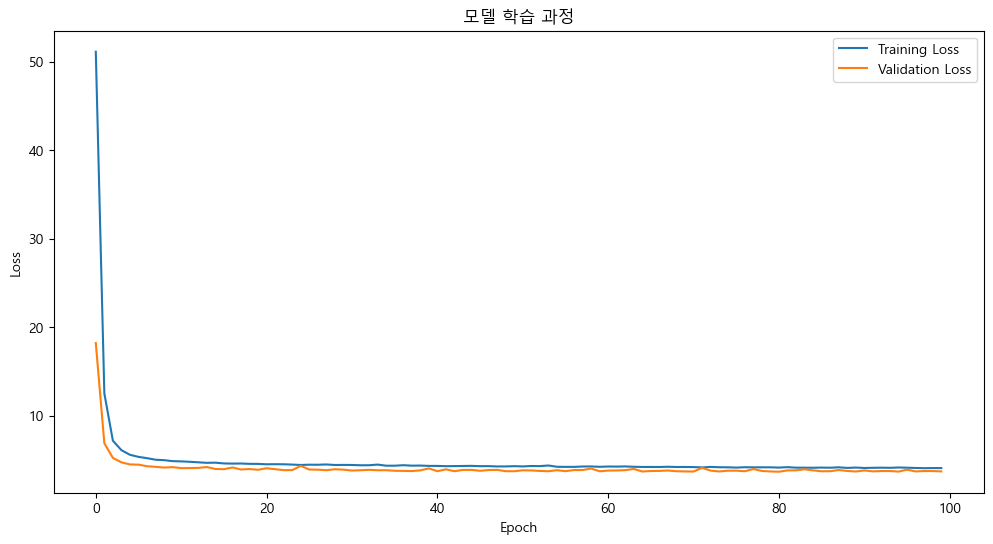

In [48]:
# 학습 과정 시각화
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('모델 학습 과정')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\n테스트 세트에 대한 평균 절대 오차: {test_mae:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7416 - mae: 1.5549  

테스트 세트에 대한 평균 절대 오차: 1.5634


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


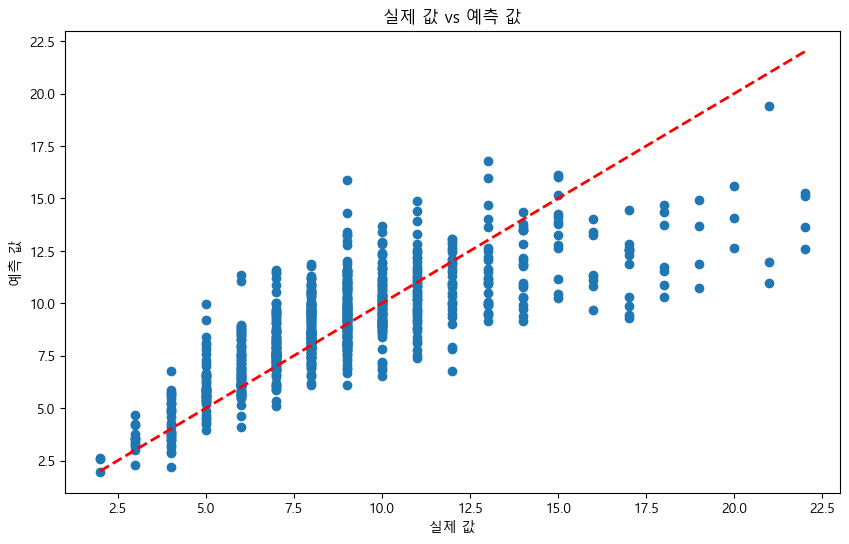

In [50]:
# 예측
predictions = model.predict(X_test)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()